In [1]:
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Read the files word_to_idx.pkl and idx_to_word.pkl () [Created by Neural_Img_Caption_Model] 
# to get the mapping between word and index
word_to_index = {}
with open ("data/textFiles/word_to_idx.pkl", 'rb') as file:
    word_to_index = pd.read_pickle(file)

index_to_word = {}
with open ("data/textFiles/idx_to_word.pkl", 'rb') as file:
    index_to_word = pd.read_pickle(file)

In [3]:
# Generate Captions for a random image in test dataset
def predict_caption(photo):

    inp_text = "startseq"

    for i in range(38):
        sequence = [word_to_index[w] for w in inp_text.split() if w in word_to_index]
        sequence = pad_sequences([sequence], maxlen=38, padding='post')

        ypred = model.predict([photo, sequence])
        ypred = ypred.argmax()
        word = index_to_word[ypred]

        inp_text += (' ' + word)

        if word == 'endseq':
            break

    final_caption = inp_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption


Loading the model...
Running model to genrate the caption...
1/1 [==============================] - 0s 23ms/step


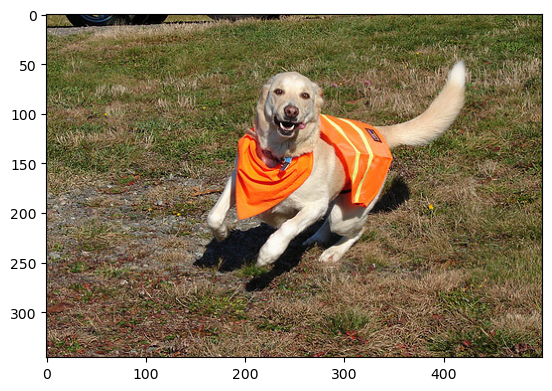

a dog running in a field


In [6]:
print("Loading the model...")
model = load_model('Models/model_19.h5')

test_encoding = {}
with open("encoded_test_features.pkl", "rb") as file:
    test_encoding = pd.read_pickle(file)

    
all_img_IDs = list(test_encoding.keys())

    # Get a random image
number = np.random.randint(0, len(test_encoding))
img_ID = all_img_IDs[int(number)]
photo = test_encoding[img_ID].reshape((1, 2048))

print("Running model to genrate the caption...")
caption = predict_caption(photo)

img_data = plt.imread("data/Images/" + img_ID + ".jpg")
plt.imshow(img_data)
# plt.axis("off")

plt.show()
print(caption)